In [16]:
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font)

### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [17]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df
# 1. 
df.head()
#  2. 
df.info()
df['DiscountRate'].fillna(df['DiscountRate'].mean(), inplace=True)
# df.info()
# 3. 
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df['OrderDate'].head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB
0   2024-06-10 17:18:00
1   2023-11-18 18:45:00
2   2023-10-15 11:19:00
3   2024-07-19 02:19:00
4   2024-01-20 20:34:00
Name: OrderDate, dtype: datetime64[ns]


C:\Users\조민훈\AppData\Local\Temp\ipykernel_7036\86770911.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DiscountRate'].fillna(df['DiscountRate'].mean(), inplace=True)


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [18]:
# 1.
df['TotalRevenue'] = df['Quantity'] * df['Price']

# 생성된 열 확인
print(df[['Quantity', 'Price', 'TotalRevenue']].head())

   Quantity  Price  TotalRevenue
0         5  37000        185000
1         5  20000        100000
2         4   8000         32000
3         1   8000          8000
4         3  26000         78000


In [19]:
!pip install matplotlib

OrderDate
2023-10-31    392000
2023-11-30    995000
2023-12-31    920000
2024-01-31    905000
2024-02-29    565000
Freq: ME, Name: TotalRevenue, dtype: int64


C:\Users\조민훈\AppData\Local\Temp\ipykernel_7036\1432891532.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M', on='OrderDate')['TotalRevenue'].sum()


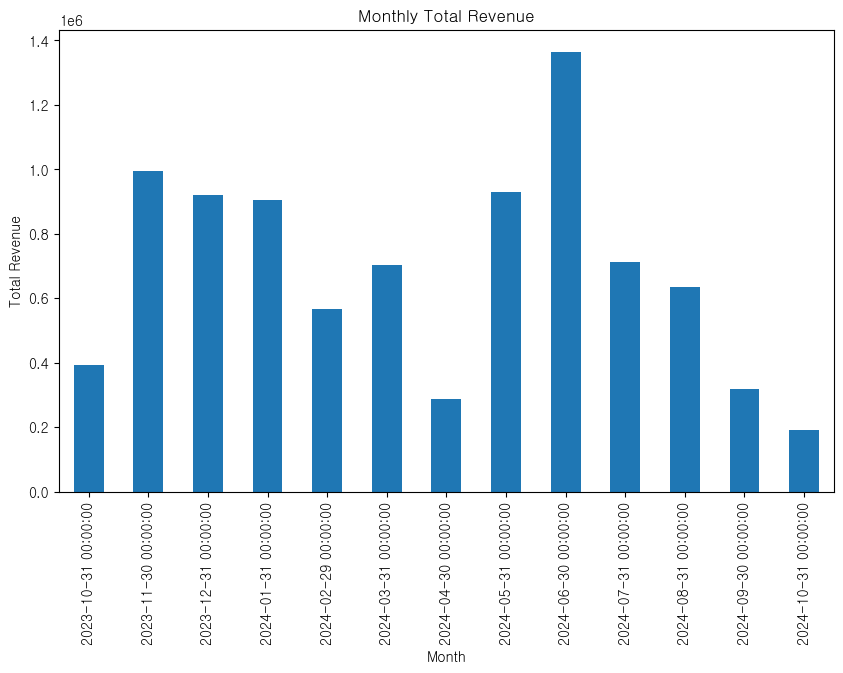

In [20]:
# 2. 2. 월별 총 매출액을 집계하여 시각화하세요.
        # - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
import matplotlib.pyplot as plt
monthly_revenue = df.resample('M', on='OrderDate')['TotalRevenue'].sum()

print(monthly_revenue.head())

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [21]:
# 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
category_revenue = df.groupby('Category').agg({'TotalRevenue': 'sum'})                          # 'agg'를 사용하여 특정 컬럼만 집계
top_3_category = category_revenue.sort_values(by='TotalRevenue', ascending=False).head(3)

print(top_3_category)

             TotalRevenue
Category                 
Food              1966000
Electronics       1746000
Beauty            1493000


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [ ]:
# 1. 고객별 총 매출액 계산 후, 상위 5명 고객 출력
customer_revenue = df.groupby('CustomerID').agg({'TotalRevenue': 'sum'})
top_5_customer = customer_revenue.sort_values(by='TotalRevenue', ascending=False).head(5)

print(top_5_customer)


# 2. 주문 횟수가 가장 많은 5명의 고객을 출력
order_count = df.groupby('CustomerID').size()
top_5_order = order_count.sort_values(ascending=False).head(5)

print(top_5_order)


# 3. 연령대에 따라 고객을 분류, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하라

# 현재 날짜 기준으로 나이 계산
current_year = pd.Timestamp.now().year
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Age'] = current_year - df['Birthdate'].dt.year

# 연령대 계산(10대, 20대, 30대, 등)
df['AgeGroup'] = (df['Age'] // 10) * 10

#연령대별로 그룹화하여 카테고리별 구매 수량 합산
grouped = df.groupby(['AgeGroup', 'Category'])['Quantity'].sum().reset_index()

# 각 연령대에서 가장 많이 구매한 카테고리 찾기
most_category = grouped.loc[grouped.groupby('AgeGroup')['Quantity'].idxmax()]

print(most_category)

            TotalRevenue
CustomerID              
1007              334000
1354              245000
1141              241000
1589              215000
1632              192000
CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
dtype: int64
    AgeGroup  Category  Quantity
4         20      Food        15
10        30      Food        30
13        40     Books        26
20        50  Clothing        23
24        60    Beauty         5


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [23]:
# 1. 가장 많이 판매된 상위 5개 상품
top_5_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_5_products)

# 2. 카테고리별로 가장 많이 판매된 상품을 찾아 출력
category_top_products = df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index()
category_top_products = category_top_products.loc[category_top_products.groupby('Category')['Quantity'].idxmax()]
print(category_top_products)

# 3. 평균 구매 수량이 가장 높은 상위 3개 상품을 출력
avg_top_product = df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)
print(avg_top_product)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64
       Category Product  Quantity
1        Beauty     립스틱        22
7         Books      소설        21
10     Clothing      셔츠        25
14  Electronics     노트북        15
23         Food      커피        20
25       Sports    요가매트        12
Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

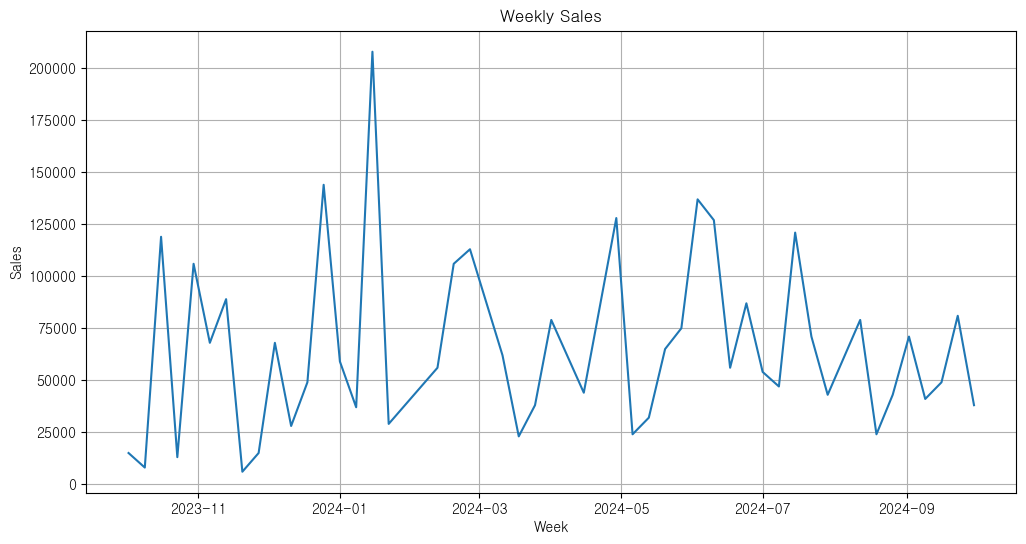

C:\Users\조민훈\AppData\Local\Temp\ipykernel_7036\2875569596.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Month'] = filter_df['OrderDate'].dt.to_period('M').apply(lambda r: r.start_time)


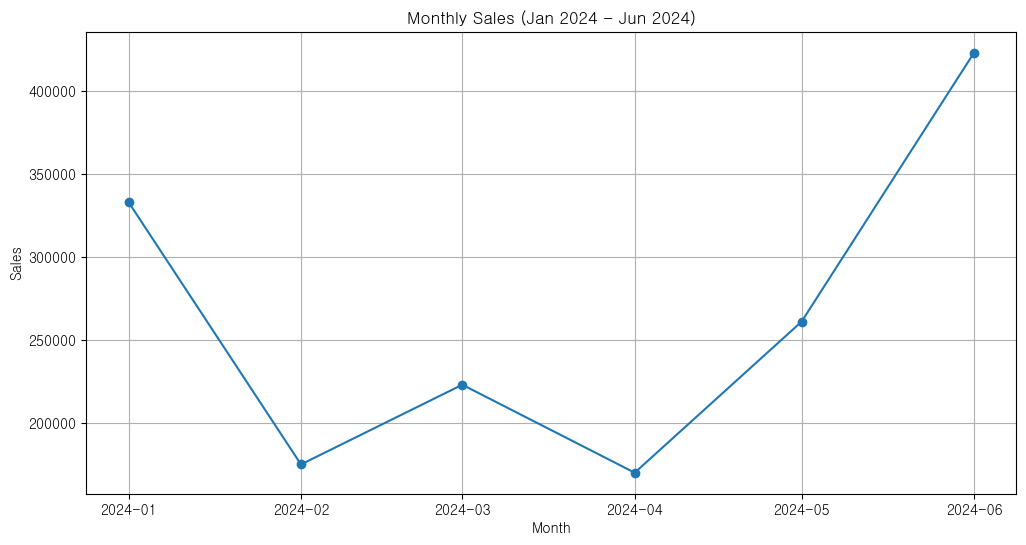

C:\Users\조민훈\AppData\Local\Temp\ipykernel_7036\2875569596.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Hour'] = country_df['OrderDate'].dt.hour


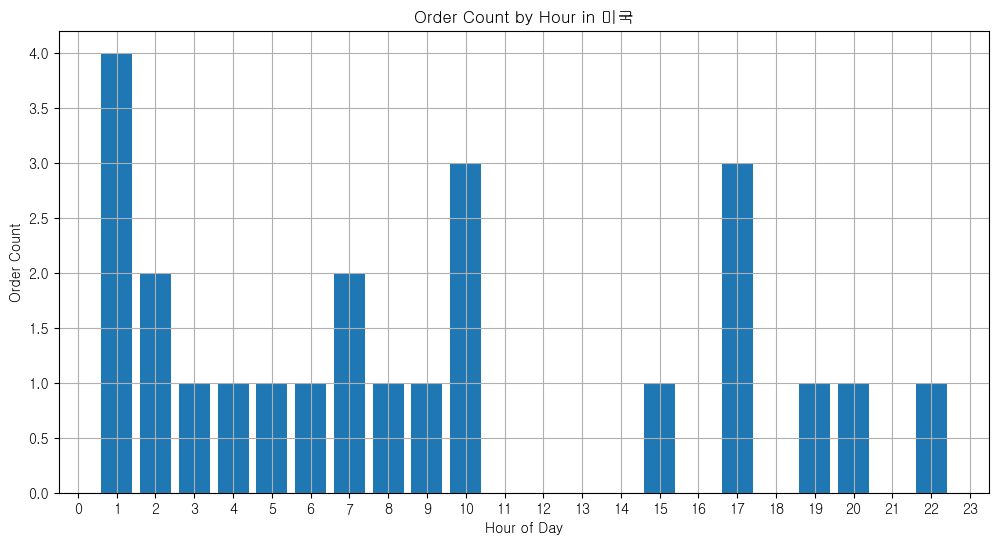

In [26]:
# 1. 주문 날짜별로 주별 매출액을 계산하고 시각화
# 날짜 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# 주별 매출액 계산
df['Week'] = df['OrderDate'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = df.groupby('Week')['Price'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 2. 특정 기간 동안의 매출 추이를 분석 및 시각화
# 특정 기간 필터링
start_date = '2024-01-01'
end_date = '2024-06-30'
filter_df = df[(df['OrderDate'] >= start_date) & (df['OrderDate'] <= end_date)]

# 월별 매출액 계산
filter_df['Month'] = filter_df['OrderDate'].dt.to_period('M').apply(lambda r: r.start_time)
monthly_sales = filter_df.groupby('Month')['Price'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales (Jan 2024 - Jun 2024)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트 도출
# 특정 국가 선택
country = '미국'
country_df = df[df['Country'] == country]

# 시간대별 주문 수 계산
country_df['Hour'] = country_df['OrderDate'].dt.hour
hour_orders = country_df.groupby('Hour').size()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hour_orders.index, hour_orders.values)
plt.title(f'Order Count by Hour in {country}')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [25]:
# 고객 재구매율 분석
# 고객별 주문 수
customer_order_count = df.groupby('CustomerID')['OrderID'].nunique()

# 재구매 고객 수 계산
repeated_customers = customer_order_count[customer_order_count > 1].count()

# 전체 고객 수
total_customers = customer_order_count.count()

# 재구매율 계산
reorder_rate = repeated_customers / total_customers

print(reorder_rate)


# 상품 카테고리별 할인을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석

0.08108108108108109
